# Goal: generate a heat map of population density for both residents and employees using US Census data for the city of Boston.

In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
import densitymetric
import matplotlib.mlab as mlab

In [12]:
# read in employee data from US Census
employee = pd.read_csv('../Data/census/BP_2012_00CZ1/BP_2012_00CZ1_with_ann.csv')

# greater Boston area zip codes (from freemaptools.com)
bostonzip = pd.read_csv('../Data/zipcode/bostonzipcodes.csv', \
        converters={'zip': lambda x: str(x)})

# filter out non-Boston zip codes
employee = employee.merge(bostonzip, on='zip')

# get latitude and longitude of zip codes
latlong = pd.read_csv('../Data/zipcode/zipcode.csv', \
        converters={'zip': lambda x: str(x)})

# add lat and long data to employee dataframe
employee = employee.merge(latlong, on='zip')

# convert non-numeric values to NaNs
employee['EMP'] = employee['EMP'].convert_objects(convert_numeric=True)

In [17]:
population = pd.read_csv(
        '../Data/census/DEC_10_SF1_GCTPH1/DEC_10_SF1_GCTPH1.ST09_with_ann.csv', 
        converters={'zip': lambda x: x[-5:]})
population = population.merge(bostonzip, on='zip')
population = population.merge(latlong, on='zip')

In [24]:
# Generate a regular grid to interpolate the data.
xmin = -71.19
xmax = -70.98
ymin = 42.29
ymax = 42.43
nx = 200
ny = 200
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
xi, yi = np.meshgrid(xi, yi)
x = employee['longitude']
y = employee['latitude']
z = employee['EMP']
destination = mlab.griddata(x, y, z, xi, yi, interp='linear')
x = population['longitude']
y = population['latitude']
z = population['SUBHD0401']
origin = mlab.griddata(x, y, z, xi, yi, interp='linear')
origdest = origin * destination

In [ ]:

density = densitymetric.getval(xi, yi, origdest, inlat, inlong, radius)

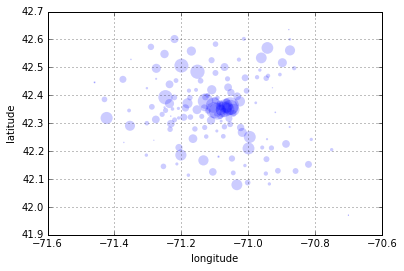

In [49]:

# plot latitude and longitude of employee locations with size determined by
# number of employees
sizevec = (employee['EMP'])
employee.plot(x='longitude', y='latitude', kind='scatter', s=sizevec/200, alpha=0.2, linewidths=0)
